# Week 01 — kNN on Wine Dataset (Classification)


## Goal
use kNN to classify Wine classes and choose k using accuracy vs k.

Compare distance metrics (Euclidean vs Manhattan) and note the impact of scaling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (142, 13) Test: (36, 13)


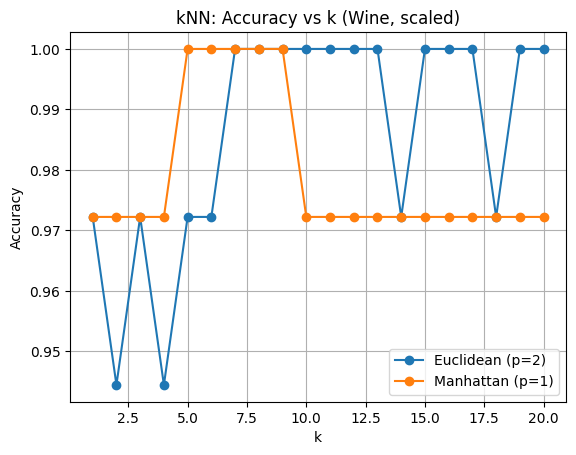

Best k (Euclidean) by accuracy: 7 acc= 1.0


In [2]:
import os
os.makedirs("../images", exist_ok=True)

ks = range(1, 21)

def acc_curve(p):
    accs = []
    for k in ks:
        model = Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=p))
        ])
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accs.append(accuracy_score(y_test, pred))
    return accs

acc_euclid = acc_curve(p=2)  # Euclidean
acc_manh   = acc_curve(p=1)  # Manhattan

plt.figure()
plt.plot(list(ks), acc_euclid, marker="o", label="Euclidean (p=2)")
plt.plot(list(ks), acc_manh, marker="o", label="Manhattan (p=1)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("kNN: Accuracy vs k (Wine, scaled)")
plt.grid(True)
plt.legend()
plt.savefig("../images/week01_knn_accuracy_vs_k.png", dpi=200, bbox_inches="tight")
plt.show()

best_k = list(ks)[int(np.argmax(acc_euclid))]
print("Best k (Euclidean) by accuracy:", best_k, "acc=", max(acc_euclid))


Final accuracy: 1.0


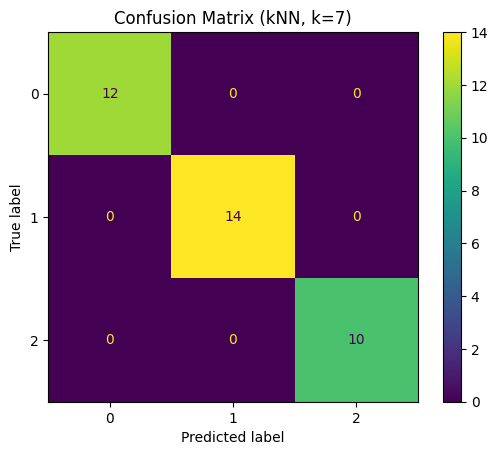

In [3]:
final_k = best_k

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=final_k))
])
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)

acc = accuracy_score(y_test, pred)
print("Final accuracy:", acc)

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix (kNN, k={final_k})")
plt.savefig("../images/week01_knn_confusion_matrix.png", dpi=200, bbox_inches="tight")
plt.show()
